In [10]:
import os,torch,logging
import sys
sys.path.append(os.path.join(os.getcwd(),'../'))

from datasets.things_eeg import EEGDataset
from torch.utils.data import DataLoader
from models.ae import Autoencoder
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from sklearn.decomposition import PCA
import umap

: 

In [3]:
config = {
    "device":torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
    "data_dir": "/dev/shm/datasets/things-eeg-small-small-small-small-small-small/Preprocessed_datasetssetssetssetssetssetssetssetssetssetssets_250Hz",
    "exp_root":'./exp',
    "name": 'eeg_mae_all',
    "lr": 1e-4,
    "epochs": 100,
    "batch_size": 12,
    "model_type":'ViT-B/32',
    "logger": True,
    "subjects":['sub-01','sub-02','sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10'],
    "eeg_model":{'name':'Autoencoder','args':{'patch_size':25,'mlp_ratio':1.0}},
}
config['exp_dir'] = os.path.join(config['exp_root'],config['name'])
test_dataset = EEGDataset(data_dir=config['data_dir'],subjects=config['subjects'],model_type=config['model_type'],mode='test')
train_dataset = EEGDataset(data_dir=config['data_dir'],subjects=config['subjects'],model_type=config['model_type'],mode='train')

logging.info(f"train num: {len(train_dataset)}, test num: {len(test_dataset)}")
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=False, drop_last=False,num_workers=12)
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=False, drop_last=True, num_workers=12, pin_memory=True)

data={ 
    'train':train_loader,
    'test':test_loader,
}

----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-01/test.pt----


----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-02/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-03/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-04/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-05/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-06/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-07/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-08/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-09/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-10/test.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-01/train.pt----
----load /dev/shm/datasets/things-eeg-small/Preprocessed_data_250Hz/sub-02/train.pt----
----load /dev/shm/datasets/things-eeg-sma

In [ ]:
# mode = 'train'
# device = config['device']
# eeg_list=[]

# subject_dict = {k:[] for k in range(10)}
# for i,sample in enumerate(data[mode]):
#     eeg, label, img, img_features,text, text_features,session,subject = sample #x:[63, 250], label:1024 text:text text_features:[1024, 1024] img:1024 img_features:[1024, 1024]
    
#     subject_dict[subject].append(session)

In [7]:
train_dataset.loaded_data[i]['eeg'].shape

torch.Size([66160, 63, 250])

In [21]:
eeg_list = []
labels = []
for i in range(10):
    eeg_list.append(train_dataset.loaded_data[i]['eeg'][:1000])
    labels.append([i for _ in range(1000)])
eeg_list = np.concatenate(eeg_list)
eeg_list = eeg_list.reshape(eeg_list.shape[0],-1)
labels = np.concatenate(labels)
print(eeg_list.shape)

(10000, 15750)


In [22]:
n_components = 100
n_neighbors = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(eeg_list)
reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=0)
embedding_2d = reducer.fit_transform(data_pca)

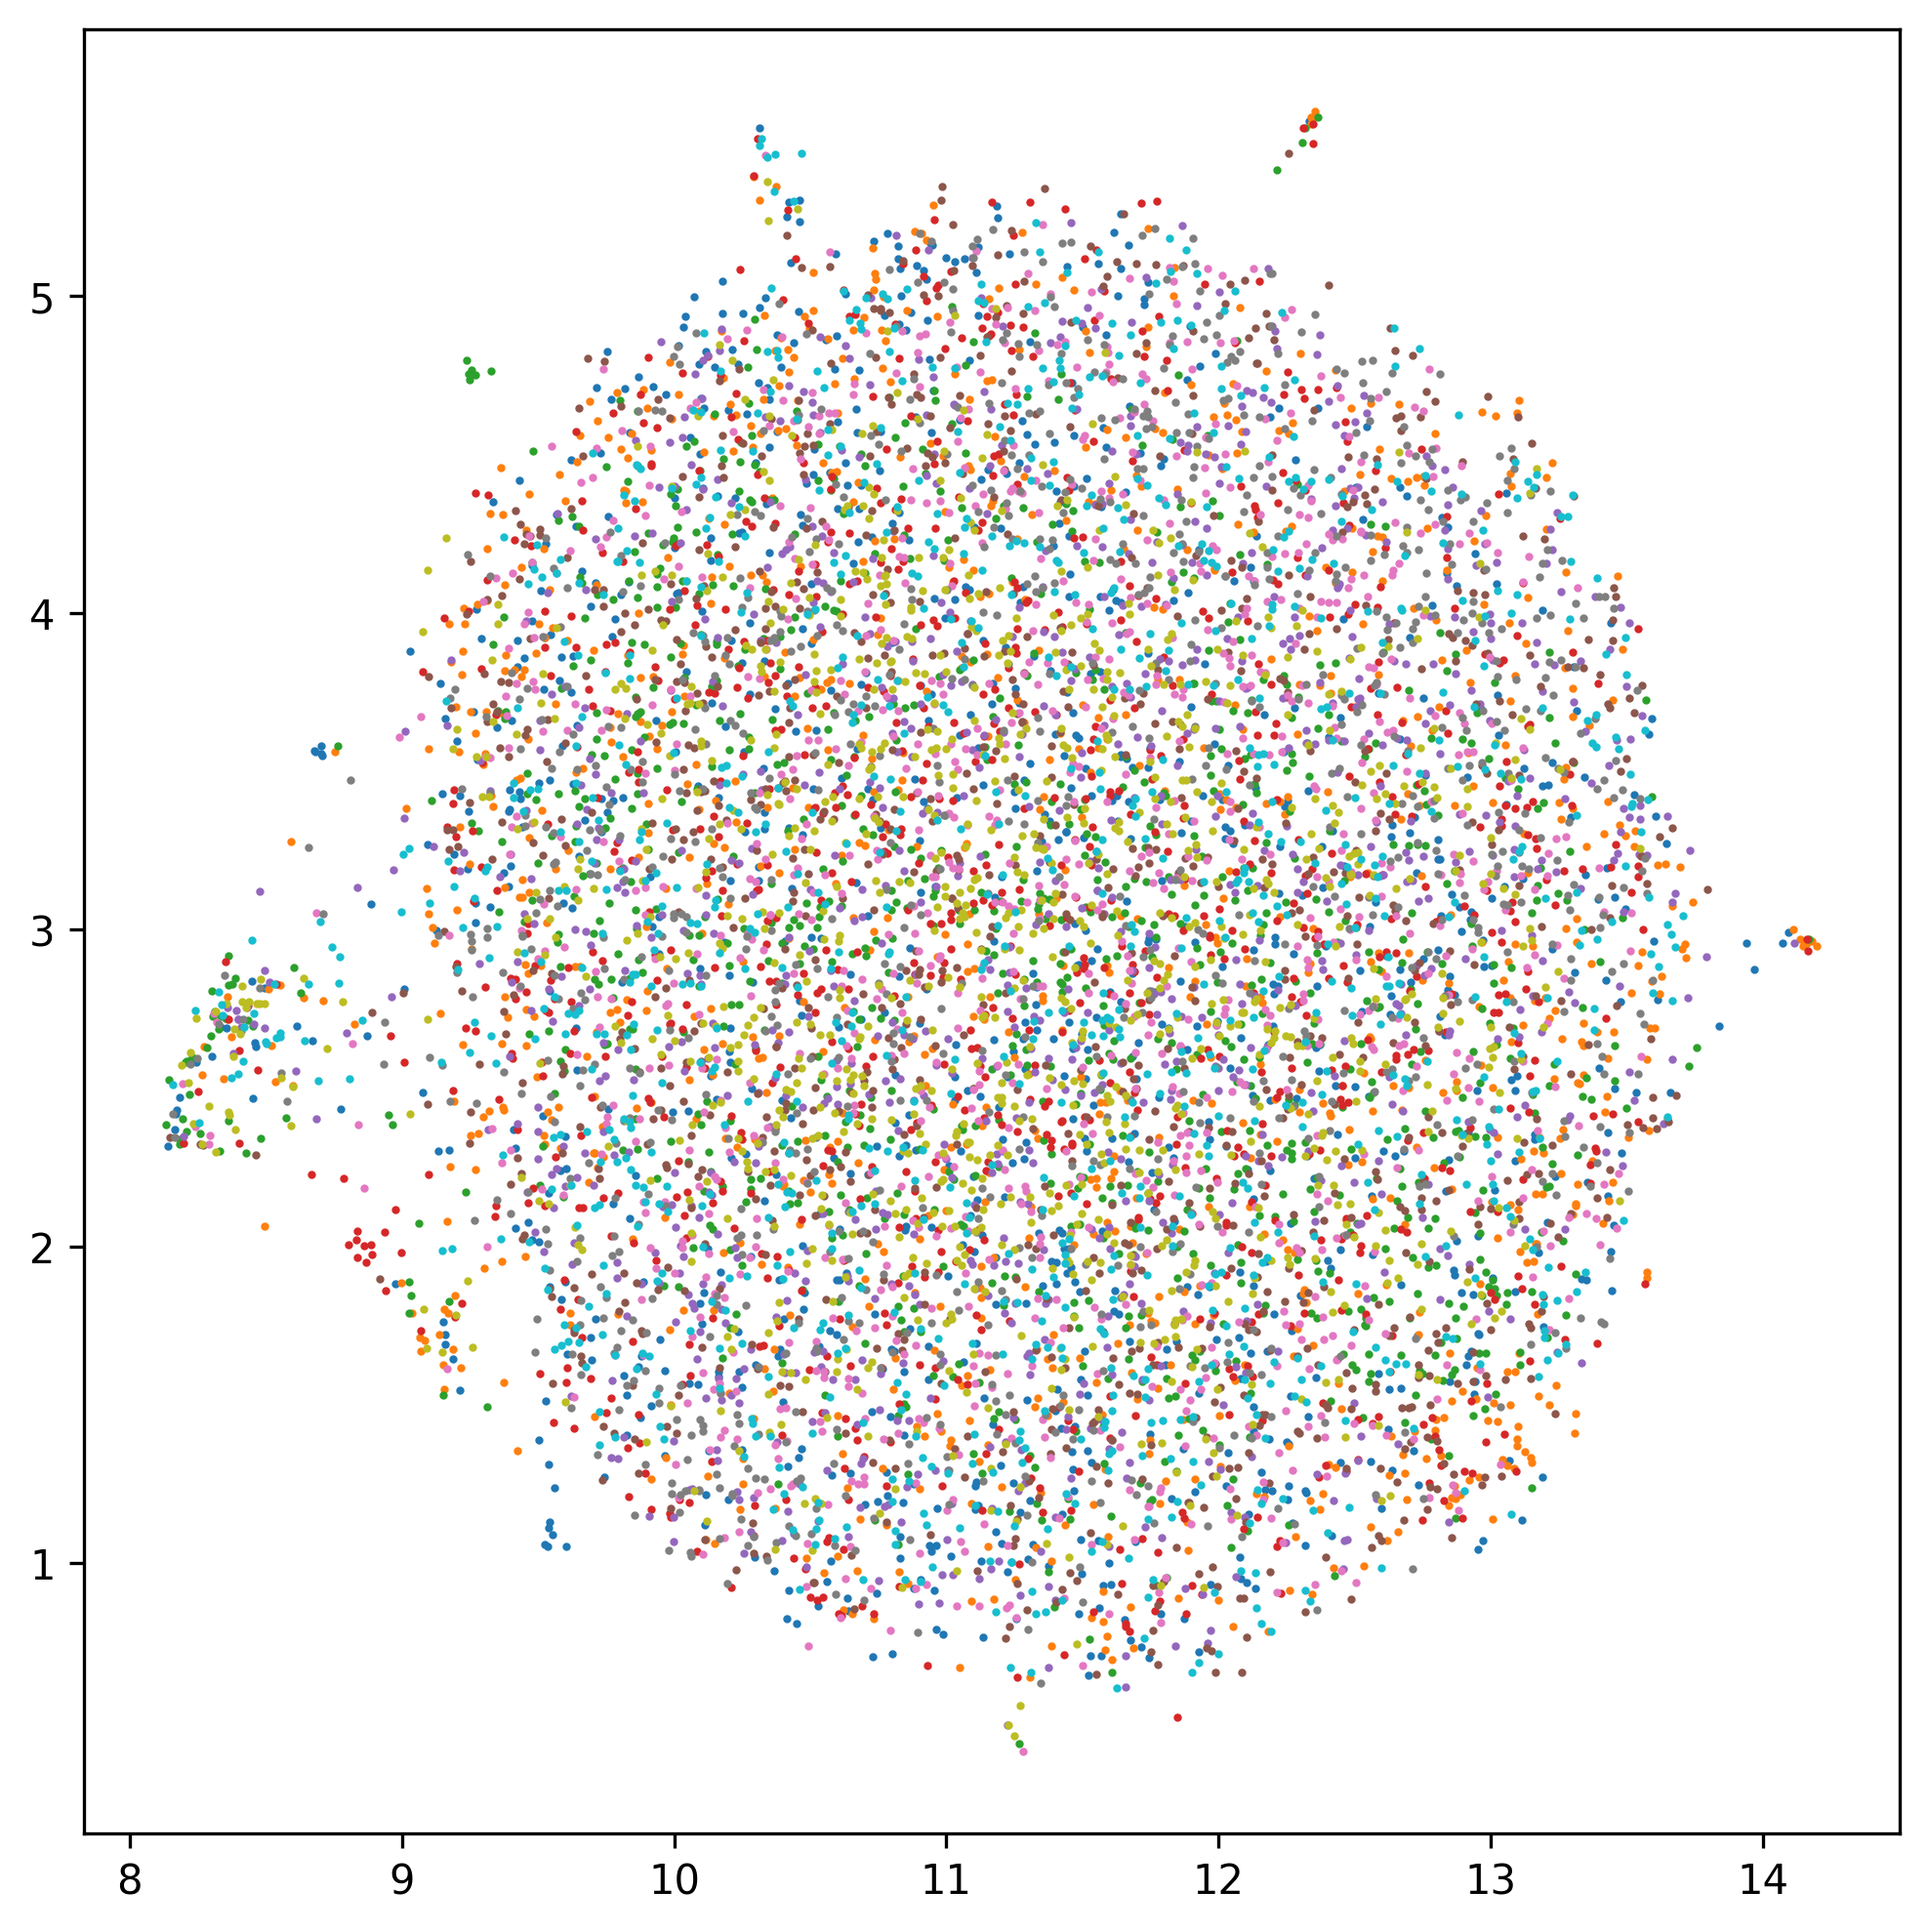

In [23]:
plt.figure(figsize=(8, 8),dpi=300) 
for label in np.unique(labels):
    indices = labels == label
    plt.scatter(embedding_2d[indices, 0], embedding_2d[indices, 1],label=label,s=1)
plt.savefig('../results/subject.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../results/subject.png', bbox_inches='tight')

In [17]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import h5py
import os


filename_list = [f"/root/workspace/wht/multimodal_brain/datasets/things-eeg-small/Preprocessed/sub-{i:02d}/preprocessed_eeg_training.npy" for i in range(1, 11)]

samples = []

def load_eeg(filename):
    data = np.load(filename, allow_pickle=True)
    return data

for filename in filename_list:
    eeg = load_eeg(filename).item()
    print(eeg['preprocessed_eeg_data'].shape)
    # eeg = np.mean(eeg['preprocessed_eeg_data'], axis=1).reshape(eeg['preprocessed_eeg_data'].shape[0], -1)
    eeg = eeg['preprocessed_eeg_data'].reshape(eeg['preprocessed_eeg_data'].shape[0]*4, -1)
    print(eeg.shape)
    samples.append(eeg[:1000])
samples = np.concatenate(samples, axis=0)
print(samples.shape)

(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(16540, 4, 17, 100)
(66160, 1700)
(10000, 1700)


In [18]:
import torch
print(samples.shape)
e = torch.tensor(samples).cuda()
eeg_pca = torch.pca_lowrank(e, q=32)
eeg_pca = torch.matmul(e, eeg_pca[2][:, :32])
eeg_pca = eeg_pca.cpu().numpy()
print(eeg_pca.shape)

(10000, 1700)
(10000, 32)


In [19]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

reducer = umap.UMAP(random_state=42)
eeg_umap = reducer.fit_transform(eeg_pca)

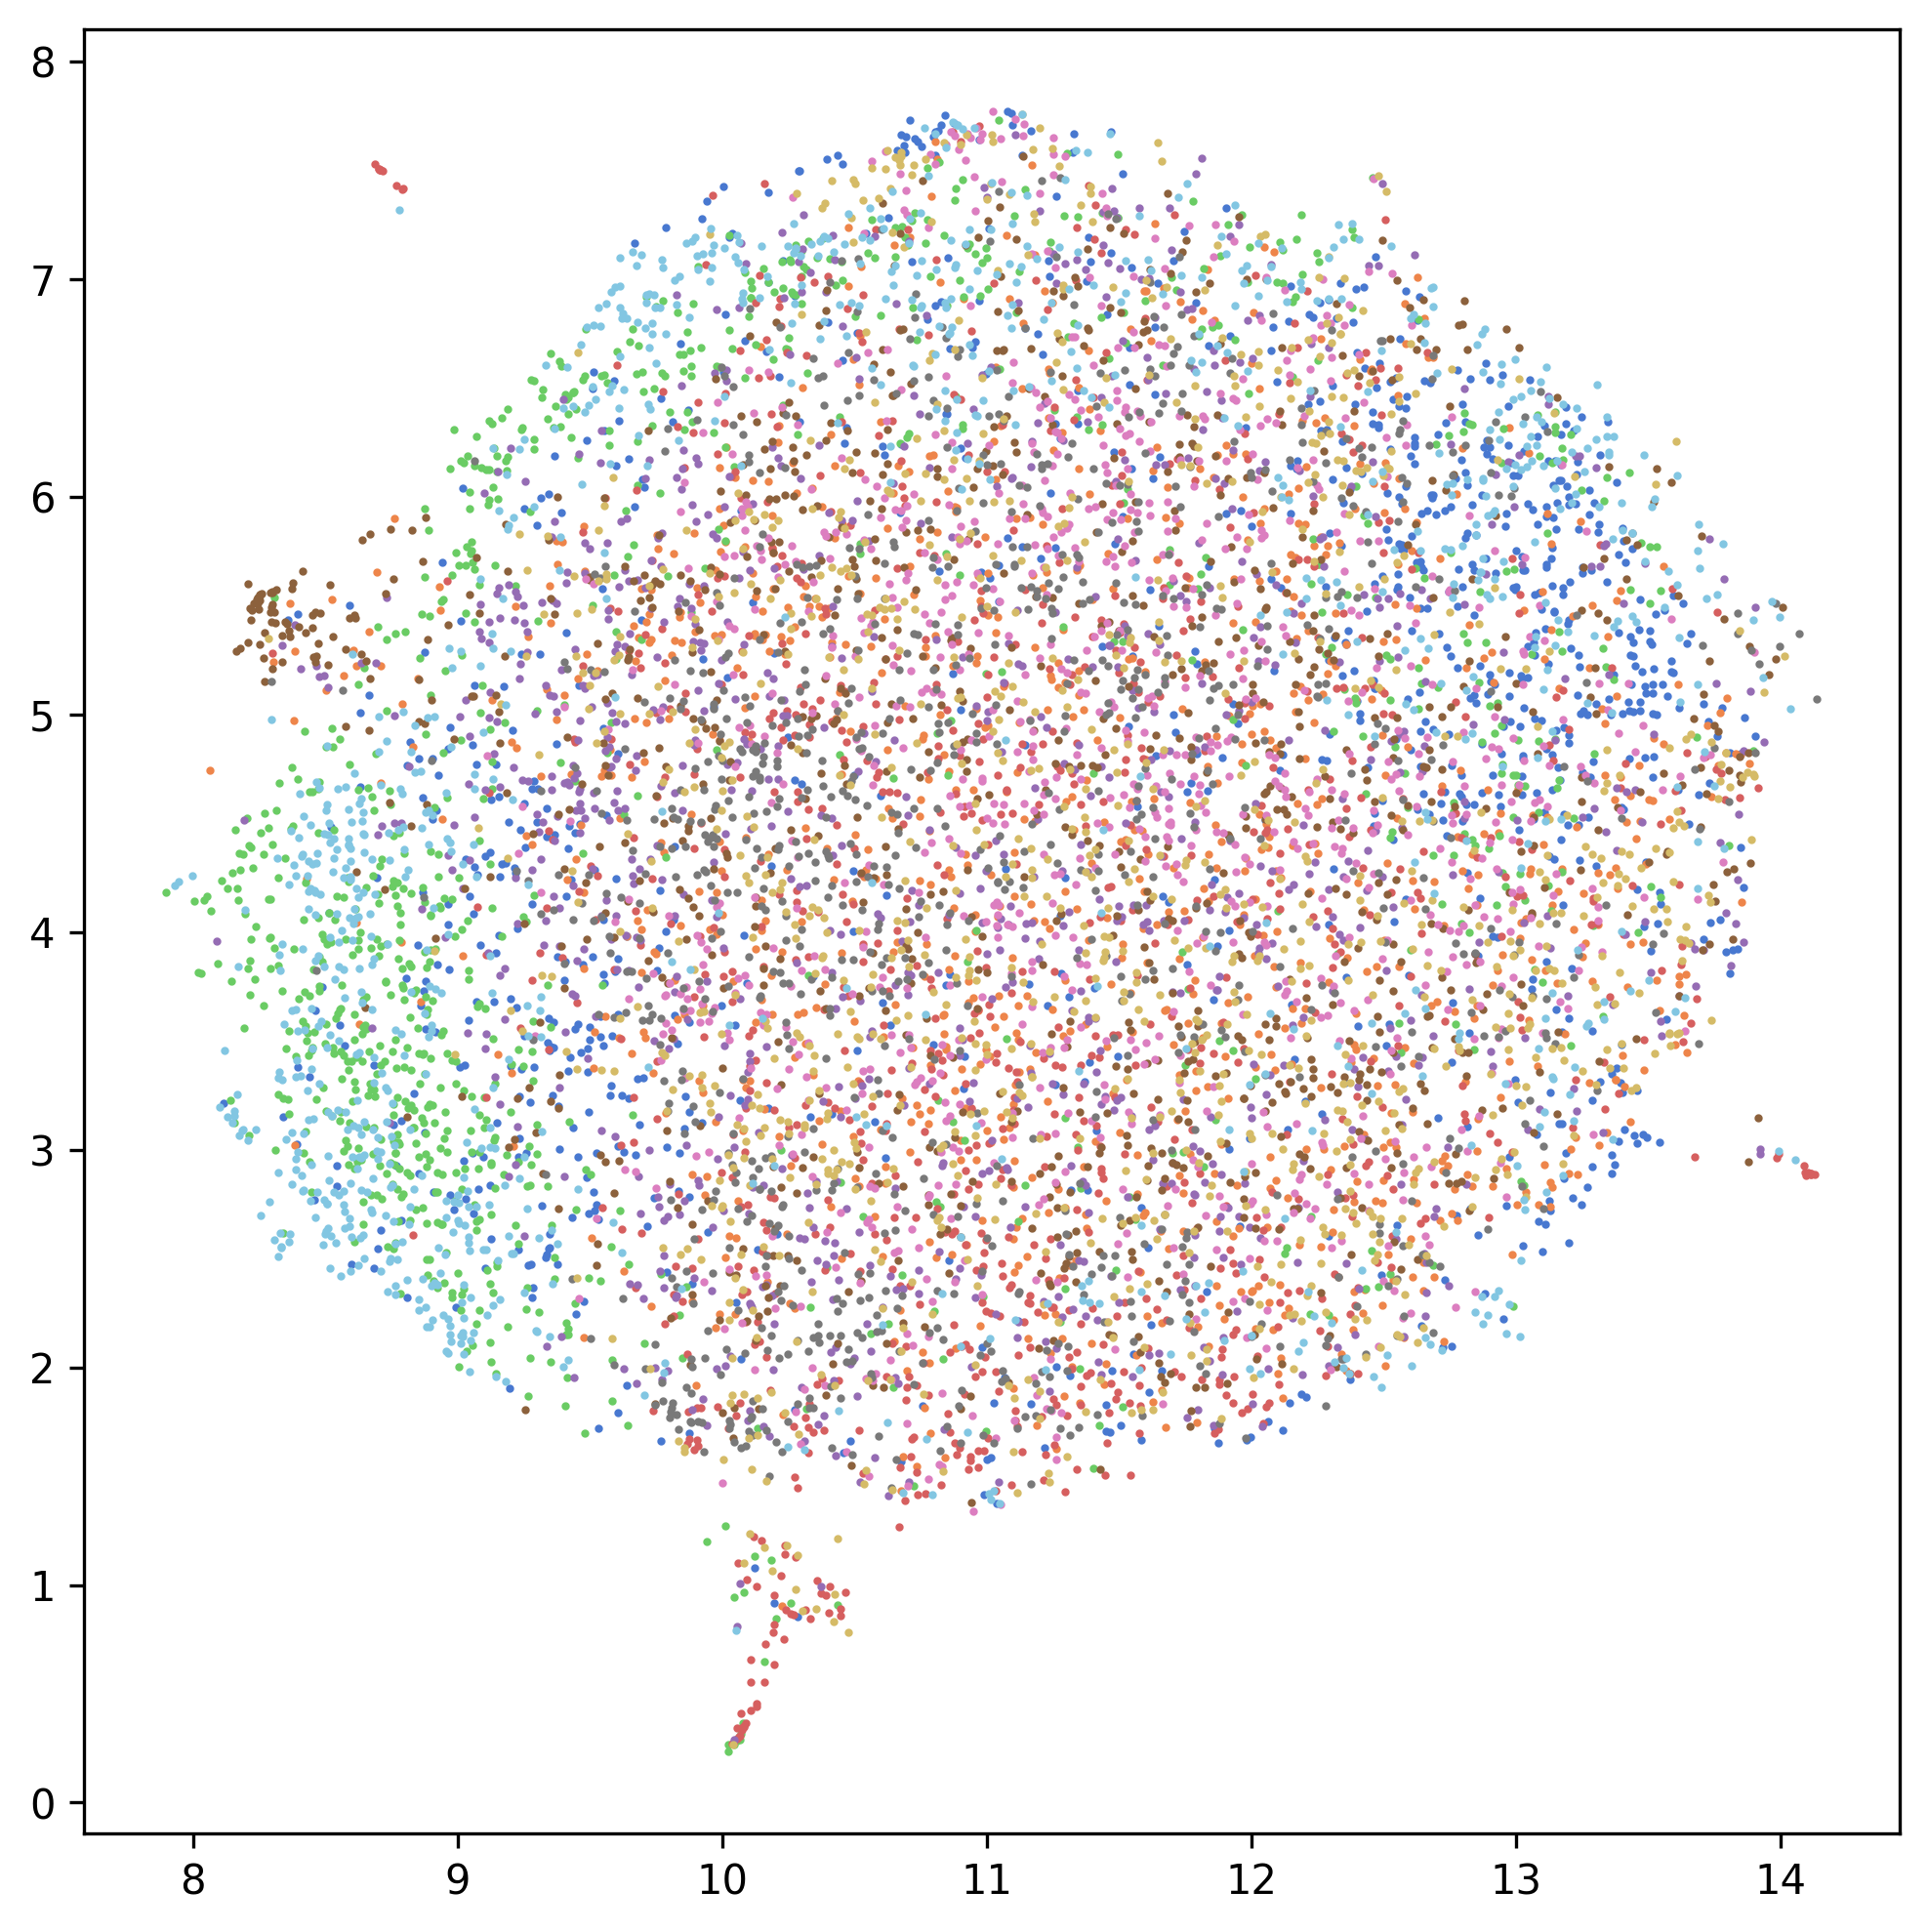

In [20]:

# 画出降维后的散点图，其中每个点的颜色代表一个被试，共有10个被试，每个被试有16540个样本
colors = sns.color_palette("muted", 10)
# colors = sns.color_palette("muted", 2)

# 创建block_labels数组
block_sizes = [1000 for i in range(10)]
# block_sizes = [16540, 16540]

block_labels = np.repeat(np.arange(1, 11), block_sizes)
# b_label = ['sub1', 'sub2']
b_label = ['sub1', 'sub2', 'sub3', 'sub4', 'sub5', 'sub6', 'sub7', 'sub8', 'sub9', 'sub10']

plt.figure(figsize=(8, 8), dpi=300)
for i in range(10):
    plt.scatter(eeg_umap[block_labels == i+1, 0], eeg_umap[block_labels == i+1, 1], s=1, color=colors[i], label=b_label[i])
# plt.title('eeg_all_subjects')
# plt.legend()
# plt.savefig('../results/subject_repeat_avg.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../results/subject_no_avg.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('../results/subject_repeat_avg.png', bbox_inches='tight')